# Udacity : In-depth exploration of Boston’s Airbnb market trends [CRISP-DM]

* Cross-industry standard process for data mining, known as CRISP-DM, it is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model.
* In 2015, IBM released a new methodology called Analytics Solutions Unified Method for Data Mining/Predictive Analytics(also known as ASUM-DM) which refines and extends CRISP-DM. 
* CRISP-DM breaks the process of data mining into major phases:

        Business Understanding
        Data Understanding
        Data Preparation
        Modeling
        Evaluation
        Deployment
        
We will follow with this sequence to acheive our goals.


`Data set acquired : `
* listings.csv 
* reviews.csv
* calendar.csv

## 1. Business Understanding

Boston AirBnB Dataset contains listings, reviews and booking dates of Boston area, reviews for each of the listings also the date availability for each listings. Analyzing the data set we try to answer our business questions.

Questions to enquire while analyzing the AirBnB data set : 

    1. How to attain the best deal price on AirBNB?
    2. How to gain better reviews?
    3. Is it possile to make an accurate predictive model for listing price based on machine leraning


## 2. Data Understanding

Begining with the analysis of the data set

In [1]:
# import important libraries
from datetime import date
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

# A simplifying sentiment analysis tool using VADER in Python to provide sentiment scores on Social Media Text.
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# import data sets
df_listings = pd.read_csv("listings.csv", index_col=None)
df_reviews = pd.read_csv("reviews.csv", index_col=None)
df_calendar = pd.read_csv("calendar.csv", index_col=None)

In [3]:
# check column data types
def check_dtype(x):
    '''
    the function will print the columns with their respective data types.
    
    '''
    list_col = list(x)
    list_dtype = list(x.dtypes)
    for i, (col, dtype) in enumerate(zip(list_col, list_dtype)):
        print('{:<8}{:<50}{}'.format(i,col,dtype))


In [4]:
# check for duplicate values and percentage count
def check_duplicate(x):
    '''
    the function will print the count of duplicate values in different columns.
    
    '''
    list_col = list(x)
    for i in list_col:
        print('{:<50}'.format(i), '{:<10}'.format(sum(x[i].duplicated())), " : " , '{0:.2f}'.format(round(sum((x[i].duplicated())/len(x))*100, 2)),'%')

In [5]:
# check for null values and percentage count
def check_null(x):
    '''
    the function will print the count of null values in different columns.
    
    '''
    list_col = list(x)
    for i in list_col:
        print('{:<50}'.format(i) , '{:<10}'.format(sum(x[i].isna())), " : " , '{0:.2f}'.format( round(sum((x[i].isna())/len(x))*100, 2)),'%')

### listings.csv

In [6]:
#listings.csv
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [7]:
#shape of data set
df_listings.shape

(3585, 95)

In [8]:
#check column data types
check_dtype(df_listings)

0       id                                                int64
1       listing_url                                       object
2       scrape_id                                         int64
3       last_scraped                                      object
4       name                                              object
5       summary                                           object
6       space                                             object
7       description                                       object
8       experiences_offered                               object
9       neighborhood_overview                             object
10      notes                                             object
11      transit                                           object
12      access                                            object
13      interaction                                       object
14      house_rules                                       object
15      thumbnail_url      

In [9]:
#check for duplicates
check_duplicate(df_listings)

id                                                 0           :  0.00 %
listing_url                                        0           :  0.00 %
scrape_id                                          3584        :  99.97 %
last_scraped                                       3584        :  99.97 %
name                                               81          :  2.26 %
summary                                            471         :  13.14 %
space                                              1316        :  36.71 %
description                                        162         :  4.52 %
experiences_offered                                3584        :  99.97 %
neighborhood_overview                              1856        :  51.77 %
notes                                              2315        :  64.57 %
transit                                            1725        :  48.12 %
access                                             1822        :  50.82 %
interaction                               

In [10]:
#check for null values
null = check_null(df_listings)

id                                                 0           :  0.00 %
listing_url                                        0           :  0.00 %
scrape_id                                          0           :  0.00 %
last_scraped                                       0           :  0.00 %
name                                               0           :  0.00 %
summary                                            143         :  3.99 %
space                                              1057        :  29.48 %
description                                        0           :  0.00 %
experiences_offered                                0           :  0.00 %
neighborhood_overview                              1415        :  39.47 %
notes                                              1975        :  55.09 %
transit                                            1290        :  35.98 %
access                                             1489        :  41.53 %
interaction                                   

#### Observations
* The data set contains 3585 data points and 95 columns(variables).
* After observing the duplicate, we observe and examine the columns carefull and perform further operations furter. 
* There are many columns with more than 90% null values, so it's wise to remove them.

### reviews.csv

In [11]:
#reviews.csv
df_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [12]:
# shape of data set
df_reviews.shape

(68275, 6)

In [13]:
#check column data types
check_dtype(df_reviews)

0       listing_id                                        int64
1       id                                                int64
2       date                                              object
3       reviewer_id                                       int64
4       reviewer_name                                     object
5       comments                                          object


In [14]:
# check for duplicates
check_duplicate(df_reviews)

listing_id                                         65446       :  95.86 %
id                                                 0           :  0.00 %
date                                               66230       :  97.00 %
reviewer_id                                        4486        :  6.57 %
reviewer_name                                      53500       :  78.36 %
comments                                           963         :  1.41 %


In [15]:
#check for null values
check_null(df_reviews)

listing_id                                         0           :  0.00 %
id                                                 0           :  0.00 %
date                                               0           :  0.00 %
reviewer_id                                        0           :  0.00 %
reviewer_name                                      0           :  0.00 %
comments                                           53          :  0.08 %


#### Observations
* The data set contains 68275 rows of data and 6 columns.
* Columns `listing_id` and `date` have more than 90% duplicates, will examine it. Columns `reviewer_id` and `reviewer_name` is not mandatory so i'll be removing them too.
* In `comments` column there are 53 null in a data set of 68275 data, which contributes to 0.08%, there i'll be removing the null value rows.

### calendar.csv

In [16]:
#calendar.csv
df_calendar.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [17]:
# shape of data set
df_calendar.shape

(1308890, 4)

In [18]:
#check column data types
check_dtype(df_calendar)

0       listing_id                                        int64
1       date                                              object
2       available                                         object
3       price                                             object


In [19]:
# check for duplicates
check_duplicate(df_calendar)

listing_id                                         1305305     :  99.73 %
date                                               1308525     :  99.97 %
available                                          1308888     :  100.00 %
price                                              1307643     :  99.90 %


In [20]:
#check for null values
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              665853      :  50.87 %


#### Observations
* The data set contains 1308890 rows of data and 4 columns.
* Column `listing_id` has 99.73% dupicate values therefor we must check for the value counts.
* Column `date` has more than 90% duplicates, will check for it.
* Columns `price` has 99.90% duplicates and 50.87% null values.

## 3. Data Preparation

### Cleaning

In [21]:
def remove_null(x):
    '''
    This function removes the columns with more than 90% null values in it.
    '''
    for i in list(x):
        if ((x[i].isna().sum() / len(x[i])) > 0.90 ):
            print(i)
            x.drop([i], axis=1, inplace=True)


In [22]:
# Get overview of how many unique values a column has.
def remove_unique(x):
    '''
    This function checks for each and every column where only single value exists in the whole column 
    and then drop the whole column.
    '''
    
    uni = x.nunique()
    uniq = pd.DataFrame({'variable':uni.index, 'unique_values':uni.values})
    for i,j in uniq.iterrows():
        if j['unique_values'] == 1:
            print([j.variable])
            x.drop([j.variable], axis = 1, inplace = True)

## `listings.csv`

##### Check for columns with more than 90% null values

In [23]:
# data set listings.csv
remove_null(df_listings)

neighbourhood_group_cleansed
square_feet
has_availability
license
jurisdiction_names


In [24]:
df_listings.shape

(3585, 90)

* Now the listings data set column has been redused to 90. 

##### Check for the columns with only 1 single data to remove

In [25]:
# data set reviews.csv
remove_unique(df_listings)

['scrape_id']
['last_scraped']
['experiences_offered']
['state']
['country_code']
['country']
['calendar_last_scraped']
['requires_license']


In [26]:
df_listings.shape

(3585, 82)

* Now the listings data set column has been redused to 82.

##### Remove unwanted columns which could not be further used in the project for the analysis.

In [27]:
# remove columns in listings
rem_list = ['listing_url', 'name','summary', 'space', 'description', 'neighborhood_overview', 'notes','transit',
            'access','interaction','host_is_superhost','thumbnail_url','medium_url', 'picture_url','xl_picture_url',
            'host_url','host_name','host_location','host_about','street','host_thumbnail_url','host_picture_url',
            'host_verifications','city','zipcode','market','smart_location','latitude','longitude','is_location_exact',
            'calendar_updated','first_review','last_review','require_guest_profile_picture',
            'require_guest_phone_verification','calculated_host_listings_count','weekly_price','monthly_price']
            
for i in rem_list:
    df_listings.drop([i], axis =1, inplace = True)

In [28]:
df_listings.columns

Index(['id', 'house_rules', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'reviews_per_month'], dtype='object')

In [29]:
df_listings.shape

(3585, 44)

In [30]:
df_listings[['host_listings_count','host_total_listings_count']].describe()

,host_listings_count,host_total_listings_count
count,3585.000000,3585.000000
mean,58.902371,58.902371
std,171.119663,171.119663
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,7.000000,7.000000
max,749.000000,749.000000


In [31]:
# fixing column "host_listings_count" and "host_total_listing_count" since both the columns have exact same values.
# As we can see from the above data all the stat values like mean, std, min,.. are the same. Hence remove it.

if len(df_listings[df_listings['host_listings_count'] == df_listings['host_total_listings_count']]) == len(df_listings):
    df_listings.drop(['host_total_listings_count'], axis = 1, inplace = True)
    


In [32]:
# check for columns where `neighbourhood` and `neighbourhood_cleansed` values are not same. Carefully oberving
# the we can safely drop the `neighbourhood` column since `neighbourhood_cleansed` provided the exact values.
len(df_listings[df_listings['neighbourhood'] != df_listings['neighbourhood_cleansed']])

1462

In [33]:
# neighbourhood_cleansed was more accurate data therefor we dump the neighbourhood column.
df_listings.drop(['neighbourhood'], axis =1 , inplace = True)

In [34]:
df_listings.shape

(3585, 42)

* Now the total number of rows and columns are 3585 and 43 respectively.

##### Convert columns with date value to datetime type

In [35]:
# listing out the date columns and converting their data type to date format.
df_listings['host_since'] =  pd.to_datetime(df_listings['host_since'])

##### Convert columns with boolean type data to bool values (0/1)

In [36]:
# change column data type to string
df_listings['instant_bookable'] = df_listings['instant_bookable'].astype(str)
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].astype(str)
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].astype(str)

In [37]:
# check for columns whoe values are boolean type ( true / false ) - "t" / "f" and convert them to 1 and 0 for true 
# and false respectively.

df_listings['instant_bookable'] = df_listings['instant_bookable'].str.replace('t','1').str.replace('f','0')
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].str.replace('t','1').str.replace('f','0')
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].str.replace('t','1').str.replace('f','0')

In [38]:
# convert data type to bool
df_listings['instant_bookable'] = df_listings['instant_bookable'].astype(np.int64)
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].astype(np.int64)
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].astype(np.int64)

##### Convert selective columns into integer data type

In [39]:
# Selecting columns which had numerial issues with it , such as the currency columns included $ sign, % sign too.

for i in ['host_response_rate','host_acceptance_rate','price','security_deposit','cleaning_fee','extra_people']:
    df_listings[i] = df_listings[i].str.replace('%','').str.replace('$','').str.replace(',','')

In [40]:
# converting columns to float data type
for i in ['host_response_rate', 'host_acceptance_rate','price','security_deposit','cleaning_fee','extra_people']:
    df_listings[i] = pd.to_numeric(df_listings[i])

In [41]:
#Few of the columns should be in natural(countable) number form so we first of all replace the null values with 
#0 and convert these columns to integer form

for i in ['bathrooms','bedrooms','beds']:
    df_listings[i] = df_listings[i].fillna(0).astype(np.int64)
    

##### Check `room_type` column data.

In [42]:
# check unique values of column bed_type and their counts.
df_listings['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

##### Check `bed_type` column data.

In [43]:
# check unique values of column bed_type and their counts.
df_listings['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

##### Check `property_type` column data.

In [44]:
# check unique values of column property_type and their counts.
df_listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

##### Check `cancellation_policy` column data and add columns as differnt unique values.

In [45]:
# check unique values of column cancellation_policy and their counts.
df_listings['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [46]:
# add columns
df_listings['strict'] = df_listings.cancellation_policy.str.contains('strict', case=False)
df_listings['flexible'] = df_listings.cancellation_policy.str.contains('flexible', case=False)
df_listings['moderate'] = df_listings.cancellation_policy.str.contains('moderate', case=False)
df_listings['super_strict_30'] = df_listings.cancellation_policy.str.contains('super_strict_30', case=False)

##### Check `aminities`  and  `house_rules`  column data and add columns as differnt unique values.

In [47]:
# There are two columns aminities and house_rules. From aminities I am goimg to fetch data for air conditioner,
# internet, parking and tv. From house rules I'll fetch smoking rules data.

df_listings['ac'] = df_listings.amenities.str.contains('air conditioning', case=False)
df_listings['internet'] = df_listings.amenities.str.contains('internet', case=False)
df_listings['parking'] = df_listings.amenities.str.contains('parking', case=False)
df_listings['tv'] = df_listings.amenities.str.contains('tv', case=False)
df_listings['breakfast'] = df_listings.amenities.str.contains('breakfast', case=False)
df_listings['no_smoking'] = df_listings.house_rules.str.contains('smoking', case=False)

* We observe that `no_smoking` column data type is object so first of all we need to check for the values and then 
  fill in the details acordingly

##### Check `host_response_time` column data and add columns as differnt unique values.

In [48]:
# check for unique values in the columns
df_listings['host_response_time'].value_counts()

within an hour        1384
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

In [49]:
# check for null values 
sum(df_listings.no_smoking.isna())

1192

In [50]:
# check for count values.
df_listings.no_smoking.value_counts()

True     1492
False     901
Name: no_smoking, dtype: int64

In [51]:
# For the sake of the health of people and the project we assume these null values signifies no smoking zone.
df_listings.no_smoking = df_listings.no_smoking.fillna('True').astype(bool)

* Now since we have fetched the necessary data from `amenities` and `house_rules` column we can drop these columns now.

In [52]:
# drop columns
df_listings.drop(['amenities','house_rules'], axis = 1 , inplace = True)

* All the wrangling process has been done. Moving on to the null values, and how to rectify or fill in the places.

In [53]:
# Check for null values.
check_null(df_listings)

id                                                 0           :  0.00 %
host_id                                            0           :  0.00 %
host_since                                         0           :  0.00 %
host_response_time                                 471         :  13.14 %
host_response_rate                                 471         :  13.14 %
host_acceptance_rate                               471         :  13.14 %
host_neighbourhood                                 339         :  9.46 %
host_listings_count                                0           :  0.00 %
host_has_profile_pic                               0           :  0.00 %
host_identity_verified                             0           :  0.00 %
neighbourhood_cleansed                             0           :  0.00 %
property_type                                      3           :  0.08 %
room_type                                          0           :  0.00 %
accommodates                                    

* So there are still null values in the data set, either we'll have to remove or fill in the blank spaces. 
* `host_response_time` column has 471 data missing, 13.14%.
* `host_response_rate` column has 471 data missing, 13.14%.
* `host_acceptance_rate` column has 471 data missing, 13.14%.
* `host_neighbourhood` column has 339 data missing, 9.46%.
* `security_deposit` column has 2243 data missing, 62.57%.
* `cleaning_fee` column has 1107 data missing, 30.88%.
* `review_scores_rating` column has 813 data missing, 22.68%.
* `review_scores_accuracy` column has 823 data missing, 22.96%.
* `review_scores_cleanliness` column has 818 data missing, 22.82%.
* `review_scores_checkin` column has 820 data missing, 22.87%.
* `review_scores_communication` column has 818 data missing, 22.82%.
* `review_scores_location` column has 822 data missing, 22.93%.
* `review_scores_value` column has 821 data missing, 22.90%.
* `reviews_per_month` column has 756 data missing around 21.09%.

##### To fill in the null values for the categorical columns, I'll use different approach to fill in the whole column.

In [54]:
# check values and their counts for host_response_time
df_listings.host_response_time.value_counts()

within an hour        1384
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

In [55]:
# Since `within an hour` and `within a few hours` are highly frequent data, therefor its safe to assume 
#`within a few hours` to fill in the place of null values.
df_listings['host_response_time'] = df_listings.host_response_time.replace(np.nan, 'within a few hours', regex=True)

##### To fill in the null values for the quantitative columns, I'll use mean function and different approach for the whole column to fill it.

In [56]:
# Fill the null values by mean as the missing values do not exceed than 25% so its safe to apply the mean to 
# fill in the values.

for i in ['host_response_rate','host_acceptance_rate','security_deposit','cleaning_fee']:
    df_listings[i] = round(df_listings[i].fillna(df_listings[i].mean()))

In [57]:
# fill null values with 0 for the column reviews per month as they might not have reviews therefor the values are null.
for i in ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']:
    df_listings[i].fillna(0,inplace=True)

##### Addition of extra column

* From the column host_since, i'll create a new column `host_since_days`. The value would be calculated as 
  last data fetched date substracted by the host_since value. 

In [58]:
# create new column host_since_days

day_scrap = ['2020-03-16'] * len(df_listings)
day_scrap = pd.to_datetime(day_scrap)
df_listings['host_since_days'] = (day_scrap - df_listings['host_since']).dt.days

In [59]:
# Now we can drop the column host_since as it serves no more purpose.
df_listings.drop(['host_since'], axis = 1 , inplace = True)

##### Remove Null values

In [60]:
# drop null value rows which consists in the columns `host_neighbourhood` and `property_type`
df_listings = df_listings.dropna(axis = 0)

In [61]:
# check for null values
check_null(df_listings)

id                                                 0           :  0.00 %
host_id                                            0           :  0.00 %
host_response_time                                 0           :  0.00 %
host_response_rate                                 0           :  0.00 %
host_acceptance_rate                               0           :  0.00 %
host_neighbourhood                                 0           :  0.00 %
host_listings_count                                0           :  0.00 %
host_has_profile_pic                               0           :  0.00 %
host_identity_verified                             0           :  0.00 %
neighbourhood_cleansed                             0           :  0.00 %
property_type                                      0           :  0.00 %
room_type                                          0           :  0.00 %
accommodates                                       0           :  0.00 %
bathrooms                                          

In [62]:
df_listings.shape

(3243, 50)

* Now the total number of rows are 3243 and 50 columns/variables.

In [65]:
# check for boolean data types
df_listings.select_dtypes(include=['bool']).columns.tolist()

['strict',
 'flexible',
 'moderate',
 'super_strict_30',
 'ac',
 'internet',
 'parking',
 'tv',
 'breakfast',
 'no_smoking']

In [66]:
# change boolean data type to integer
for x in df_listings.select_dtypes(include=['bool']).columns.tolist():
    df_listings[x] = df_listings[x].astype(np.int64)

In [67]:
# check data type of columns
check_dtype(df_listings)

0       id                                                int64
1       host_id                                           int64
2       host_response_time                                object
3       host_response_rate                                float64
4       host_acceptance_rate                              float64
5       host_neighbourhood                                object
6       host_listings_count                               int64
7       host_has_profile_pic                              int64
8       host_identity_verified                            int64
9       neighbourhood_cleansed                            object
10      property_type                                     object
11      room_type                                         object
12      accommodates                                      int64
13      bathrooms                                         int64
14      bedrooms                                          int64
15      beds                   

## `reviews.csv`

In [68]:
# explore data set and decide which columns to keep.
df_reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


* This data set consists of reviews of AirBnB from customer. 
* So its important to keep `comments` column and `listing_id` column to join this data set with the `listings` data set.
* Rest of the columns are not necessary, so i'll drop them.

In [69]:
# drop columns 
df_reviews.drop(['reviewer_id','reviewer_name'], axis = 1, inplace = True)

##### Check for null values

In [70]:
check_null(df_reviews)

listing_id                                         0           :  0.00 %
id                                                 0           :  0.00 %
date                                               0           :  0.00 %
comments                                           53          :  0.08 %


* There is are 53 data missing in column `comments` which comprises of 0.08% of the total data.

##### Remove null values

In [71]:
# Since the null values totals to  data around 0.08%. So it would mean no harm to remove the null values
df_reviews = df_reviews.dropna(axis = 0)

In [72]:
#check for null
check_null(df_reviews)

listing_id                                         0           :  0.00 %
id                                                 0           :  0.00 %
date                                               0           :  0.00 %
comments                                           0           :  0.00 %


In [73]:
df_reviews.shape

(68222, 4)

* Now the total number of rows are 68222 and 4 columns respectively.

In [74]:
# change data type for date column to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

##### Check data type for columns

In [75]:
check_dtype(df_reviews)

0       listing_id                                        int64
1       id                                                int64
2       date                                              datetime64[ns]
3       comments                                          object


## `calendar.csv`

In [76]:
# explore data set and decide which columns to keep.
df_calendar.head(20)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [77]:
len(df_calendar.listing_id.value_counts())

3585

In [78]:
check_dtype(df_calendar)

0       listing_id                                        int64
1       date                                              object
2       available                                         object
3       price                                             object


In [79]:
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              665853      :  50.87 %


* This data set consists of reviews of AirBnB from customer. 
* So its important to keep `comments` column and `listing_id` column to join this data set with the `listings` data set.
* Rest of the columns are not necessary, so i'll drop them.

In [80]:
# remove $ from price column
df_calendar['price'] = df_calendar['price'].str.replace("$",'').str.replace(",",'')

In [81]:
# change t/f to 1/0 in column `available`
df_calendar['available'] = df_calendar['available'].str.replace('t','1').str.replace('f','0')

In [82]:
# change data type for columns `date`, `available` and `price`.
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['available'] = df_calendar['available'].astype(np.int64)
df_calendar['price'] = pd.to_numeric(df_calendar['price'])

##### Check data type for columns

In [83]:
check_dtype(df_calendar)

0       listing_id                                        int64
1       date                                              datetime64[ns]
2       available                                         int64
3       price                                             float64


##### Check for null values

In [84]:
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              665853      :  50.87 %


* There is are 665853 data missing in column `price` which comprises of 50.87% of the total data.

In [85]:
df_calendar.shape

(1308890, 4)

* There are 1308890 rows and 4 columns in the data set.

##### Remove null values

In [86]:
# Since the null values totals to  data around 0.08%. So it would mean no harm to remove the null values
df_calendar = df_calendar.dropna(axis = 0)

In [87]:
#check for null
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              0           :  0.00 %


In [88]:
df_calendar.shape

(643037, 4)

* Now total number of rows are 643037 and 4 columns.

## 4. Modeling

##### Check comment sentiment scores

In [89]:
# The material on sentiment analysis has been pulled out from medium, where a model has been created to provide the 
# scores based on a sentiment of a sentence. This will be helpful while analyzing the comment and append scores to it.
# Thanks to author for providing the material.
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

* The `compound` score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). The higher the compound value the higher is the positive score for the given sentence. There are four parameters provided during output, 1. neg - stands for negative score, 2. neu - stands for neutral score, 3. pos - stands for positive score and 4. compond which aggregates all the scores and provides a unified score.

In [90]:
df_reviews['comments'] = df_reviews['comments'].astype(str)

In [91]:
df_reviews

,listing_id,id,date,comments
0,1178162,4724140,2013-05-21,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...
68270,7462268,80537457,2016-06-18,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,Staying in Lower Allston at Joe and Nancy's pl...


In [92]:
# create a dictionary to store sentiments values
datax = {'neg':[],'neu':[],'pos':[],'compound':[]}

In [93]:
# store sentiment values to datax
comm = df_reviews['comments'].astype(str)

for text in comm:
    lol = sentiment_analyzer_scores(text)
    for a in [lol]:
        datax['neg'].append(lol['neg'])
        datax['neu'].append(lol['neu'])
        datax['pos'].append(lol['pos'])
        datax['compound'].append(lol['compound'])

In [95]:
# converting datax data type to pandas dataframe.
data_x = pd.DataFrame(datax)

In [96]:
# check shape for the data
data_x.shape

(68222, 4)

In [97]:
# addings the columns 'neg','neu','pos','compound' to df_reviews dataframe
df_reviews = pd.concat([df_reviews,data_x], axis = 1)

In [98]:
df_reviews

,listing_id,id,date,comments,neg,neu,pos,compound
0,1178162.0,4724140.0,2013-05-21,My stay at islam's place was really cool! Good...,0.0,0.653,0.347,0.9626
1,1178162.0,4869189.0,2013-05-29,Great location for both airport and city - gre...,0.0,0.650,0.350,0.9061
2,1178162.0,5003196.0,2013-06-06,We really enjoyed our stay at Islams house. Fr...,0.0,0.776,0.224,0.9662
3,1178162.0,5150351.0,2013-06-15,The room was nice and clean and so were the co...,0.0,0.685,0.315,0.9229
4,1178162.0,5171140.0,2013-06-16,Great location. Just 5 mins walk from the Airp...,0.0,0.662,0.338,0.8658
...,...,...,...,...,...,...,...,...
68270,7462268.0,80537457.0,2016-06-18,Joe y su mujer son encantadores. La habitación...,NaN,NaN,NaN,NaN
68271,7462268.0,83640094.0,2016-07-03,Joe was on his way to Jamaica to be married! o...,NaN,NaN,NaN,NaN
68272,7462268.0,85797088.0,2016-07-13,The room was very clean as were the bathrooms ...,NaN,NaN,NaN,NaN
68273,7462268.0,97264637.0,2016-08-26,Staying in Lower Allston at Joe and Nancy's pl...,NaN,NaN,NaN,NaN


In [99]:
df_reviews.describe()

,listing_id,id,neg,neu,pos,compound
count,6.822200e+04,6.822200e+04,68222.000000,68222.000000,68222.000000,68222.000000
mean,4.758567e+06,5.244331e+07,0.013472,0.712327,0.274186,0.809252
std,3.787699e+06,2.789821e+07,0.031235,0.142697,0.148756,0.328915
min,3.353000e+03,1.021000e+03,0.000000,0.000000,0.000000,-0.997500
25%,1.458081e+06,3.009459e+07,0.000000,0.639000,0.183000,0.835300
50%,4.080000e+06,5.221266e+07,0.000000,0.724000,0.264000,0.935900
75%,7.377034e+06,7.661062e+07,0.016000,0.798000,0.353000,0.970900
max,1.484378e+07,9.999045e+07,0.688000,1.000000,1.000000,0.999400


* Since the reviews are multiple for listings_id, therefor i'll be aggregating the values with mean() function by performing groupby `listing_id`


In [100]:
# perform mean on 'neg','neu','pos','compound' by grouping by listing_id and store in new dataframe
df_rev = df_reviews.groupby('listing_id').agg({'neg': ['mean'],'neu': ['mean'],'pos': ['mean'],'compound': ['mean']})

In [101]:
# check data
df_rev

,neg,neu,pos,compound
,mean,mean,mean,mean
listing_id,,,,
3353.0,0.024029,0.758324,0.217676,0.700406
5506.0,0.006583,0.731889,0.261528,0.892311
6695.0,0.016021,0.731936,0.252064,0.841979
6976.0,0.006390,0.711098,0.282537,0.933349
8792.0,0.012333,0.747556,0.239944,0.788922
...,...,...,...,...
14813006.0,0.000000,0.684000,0.316000,0.571900
14823724.0,0.051000,0.886000,0.063000,0.128000


* Applying multiple aggregation functions to columns will result in a multiindex, therefor we must handle it.
 

In [102]:
# Rename columns in the dataframe
df_rev.columns = ['neg_mean', 'neu_mean', 'pos_mean', 'compound_mean']

In [103]:
# Reset index to make everything right.
df_rev = df_rev.reset_index()

In [104]:
df_rev

,listing_id,neg_mean,neu_mean,pos_mean,compound_mean
0,3353.0,0.024029,0.758324,0.217676,0.700406
1,5506.0,0.006583,0.731889,0.261528,0.892311
2,6695.0,0.016021,0.731936,0.252064,0.841979
3,6976.0,0.006390,0.711098,0.282537,0.933349
4,8792.0,0.012333,0.747556,0.239944,0.788922
...,...,...,...,...,...
2824,14813006.0,0.000000,0.684000,0.316000,0.571900
2825,14823724.0,0.051000,0.886000,0.063000,0.128000
2826,14842237.0,0.000000,0.544000,0.456000,0.968200
2827,14843050.0,0.000000,0.639000,0.361000,0.921950


### Merging two dataframes `df_listings` and `df_rev` (cleaned `df_reviews`)

In [105]:
# joining two data frames with the unique id 
df_final = pd.merge(df_listings,df_rev,how = 'inner', left_on=['id'], right_on = ['listing_id'])

In [106]:
# check shape for new dataframe
df_final.shape

(2577, 55)

In [107]:
# check for null values
check_null(df_final)

id                                                 0           :  0.00 %
host_id                                            0           :  0.00 %
host_response_time                                 0           :  0.00 %
host_response_rate                                 0           :  0.00 %
host_acceptance_rate                               0           :  0.00 %
host_neighbourhood                                 0           :  0.00 %
host_listings_count                                0           :  0.00 %
host_has_profile_pic                               0           :  0.00 %
host_identity_verified                             0           :  0.00 %
neighbourhood_cleansed                             0           :  0.00 %
property_type                                      0           :  0.00 %
room_type                                          0           :  0.00 %
accommodates                                       0           :  0.00 %
bathrooms                                          

* Since there are null values for mean sentiment scores columns because I did a outer join, so its safe to assume to replace 0 with the null values as there are no comments for these id's hence the sentiment value must be 0  i.e, neutral.

In [108]:
# fill null values with 0
for c in ['neg_mean','neu_mean','pos_mean','compound_mean']:
    df_final[c] = df_final[c].fillna(0)

* As the dataframe took its final shape it's time to remove the columns which are not necessary any further. The columns are `id` , `host_id` and `listing_id`.

In [109]:
# drop columns
df_final.drop(['id','host_id','listing_id'], axis = 1, inplace = True)

In [110]:
df_final

,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,strict,flexible,moderate,super_strict_30,ac,internet,parking,tv,breakfast,no_smoking,host_since_days,neg_mean,neu_mean,pos_mean,compound_mean
0,within an hour,100.0,100.0,Roslindale,1,1,1,Roslindale,Apartment,Private room,2,1,1,1,Real Bed,65.0,95.0,10.0,0,0.0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,moderate,1.30,0,0,1,0,1,1,0,1,0,1,2839,0.011806,0.705361,0.282833,0.922339
1,within a few hours,100.0,88.0,Roslindale,1,1,1,Roslindale,Apartment,Private room,2,1,1,1,Real Bed,65.0,325.0,68.0,1,20.0,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,moderate,0.47,0,0,1,0,1,1,1,1,0,1,3962,0.006390,0.711098,0.282537,0.933349
2,within an hour,100.0,100.0,Roslindale,1,1,1,Roslindale,House,Private room,2,1,1,2,Real Bed,79.0,325.0,15.0,1,0.0,2,31,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,flexible,2.25,0,1,0,0,1,1,0,0,1,1,2136,0.007931,0.749000,0.243069,0.784662
3,within a few hours,100.0,95.0,Roslindale,2,1,1,Roslindale,Condominium,Private room,2,1,1,1,Real Bed,75.0,325.0,30.0,1,0.0,2,1125,5,28,58,58,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0,flexible,1.70,0,1,0,0,1,1,1,1,0,1,1454,0.005625,0.772000,0.222375,0.829000
4,within an hour,98.0,96.0,Roslindale,5,1,1,Roslindale,Apartment,Entire home/apt,3,1,1,2,Real Bed,100.0,325.0,68.0,1,25.0,1,1125,22,39,69,344,57,90.0,10.0,10.0,10.0,10.0,9.0,9.0,0,strict,4.00,1,0,0,0,0,1,1,1,0,1,2487,0.035263,0.748123,0.216649,0.631054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,within an hour,100.0,95.0,Somerville,14,1,1,Charlestown,Apartment,Private room,2,1,1,1,Real Bed,65.0,325.0,25.0,1,30.0,1,1125,20,50,80,170,2,80.0,9.0,10.0,9.0,9.0,10.0,10.0,1,flexible,2.00,0,1,0,0,0,1,0,0,0,1,1670,0.028000,0.751500,0.221000,0.917250
2573,within an hour,100.0,100.0,Chestnut Hill,2,1,0,West Roxbury,Townhouse,Private room,1,1,1,1,Real Bed,68.0,950.0,68.0,1,35.0,1,1125,28,58,88,363,1,80.0,8.0,8.0,8.0,6.0,10.0,8.0,0,moderate,1.00,0,0,1,0,0,1,1,0,0,1,1299,0.019000,0.742000,0.238000,0.980800
2574,within an hour,96.0,100.0,Somerville,28,1,1,Charlestown,Apartment,Private room,2,1,1,1,Real Bed,69.0,95.0,68.0,1,24.0,2,1125,25,51,81,356,6,70.0,8.0,7.0,9.0,10.0,8.0,7.0,1,strict,0.33,1,0,0,0,1,1,1,0,0,1,2055,0.007500,0.706167,0.286333,0.878800
2575,within an hour,96.0,100.0,Somerville,28,1,1,Charlestown,Apartment,Private room,3,1,1,1,Real Bed,69.0,95.0,68.0,1,24.0,2,1125,21,51,81,356,4,90.0,10.0,10.0,10.0,10.0,8.0,9.0,1,strict,0.34,1,0,0,0,1,1,1,0,0,1,2055,0.005250,0.803250,0.191500,0.754475


In [111]:
# check data types
check_dtype(df_final)

0       host_response_time                                object
1       host_response_rate                                float64
2       host_acceptance_rate                              float64
3       host_neighbourhood                                object
4       host_listings_count                               int64
5       host_has_profile_pic                              int64
6       host_identity_verified                            int64
7       neighbourhood_cleansed                            object
8       property_type                                     object
9       room_type                                         object
10      accommodates                                      int64
11      bathrooms                                         int64
12      bedrooms                                          int64
13      beds                                              int64
14      bed_type                                          object
15      price                 

### Visualizing the data

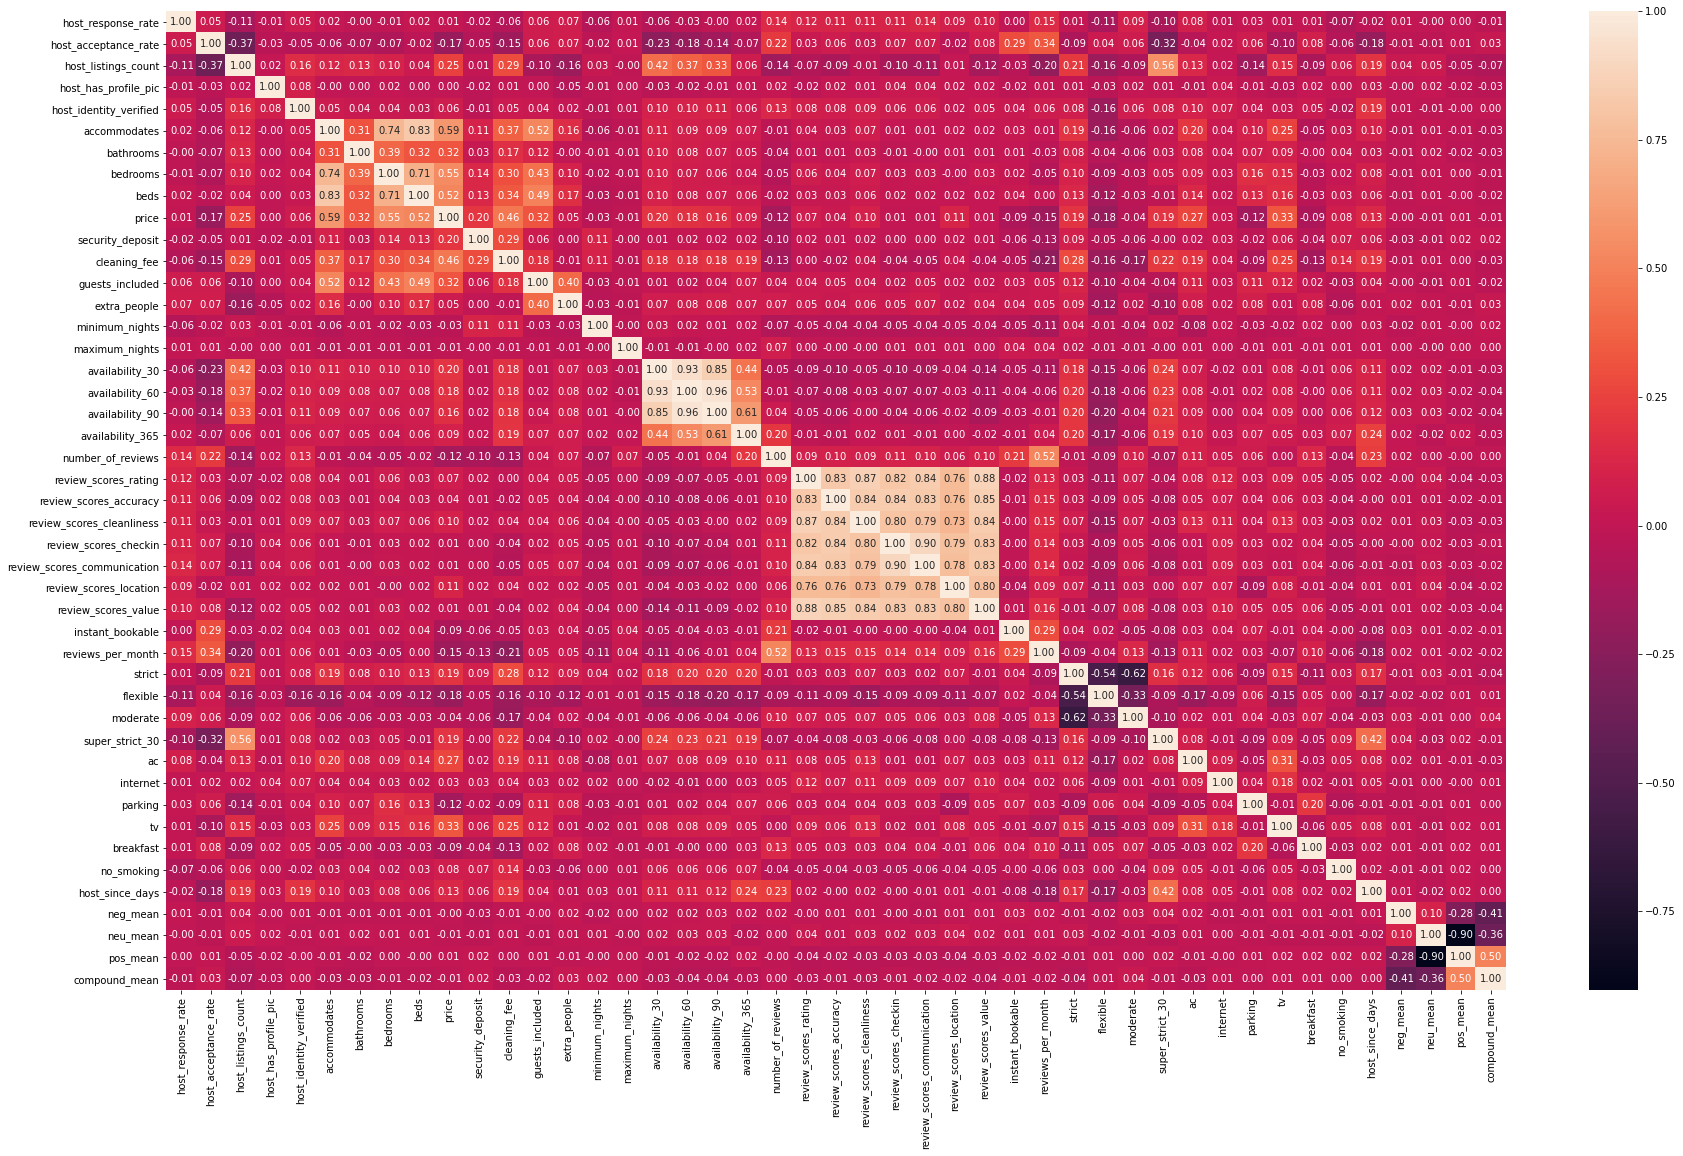

In [115]:
# visualizing the dataframe with heat map and check for the correlation between different varibales.
fig, ax = plt.subplots(figsize=(30,18))
sns.heatmap(df_final.corr(), annot = True,  fmt='.2f');

* We can clearly observe that there are many variables which highly correlate with each others. So the variable which correlate with each other with more than 65%, i'll be removing those columns to make the data set free of any interdependancy.
* Columns `bedrooms` and `beds` have huge correlation with bathrooms, drop these.
* Columns `availability_30`, `availability_60` and `availability_90` also have huge correlation with availablity_365, drop these.
* Column `review_scores_accuracy`,`review_scores_cleanliness`,`review_scores_checkin`,`review_scores_communication`, `review_scores_location` and `review_scores_value` has high correlation with review_scores_rating, drop it.
* Columns `neg_mean`, `neu_mean` and `pos_mean` also have huge correlation with compound_mean, drop these.

In [116]:
# drop columns
high_corr = ['bedrooms','beds','availability_30','availability_60','availability_90','review_scores_accuracy', 
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'review_scores_location', 'review_scores_value','neg_mean','neu_mean','pos_mean']
df_final.drop(high_corr, axis = 1, inplace = True)

## 5. Evaluation

In this step I will answer all the questions which have been raised before for the profitable business solutions.

### 5.1 Which neighbourhoods in Boston are the most costliest and cheapest ?


Text(0.5, 0, 'Price ($)')

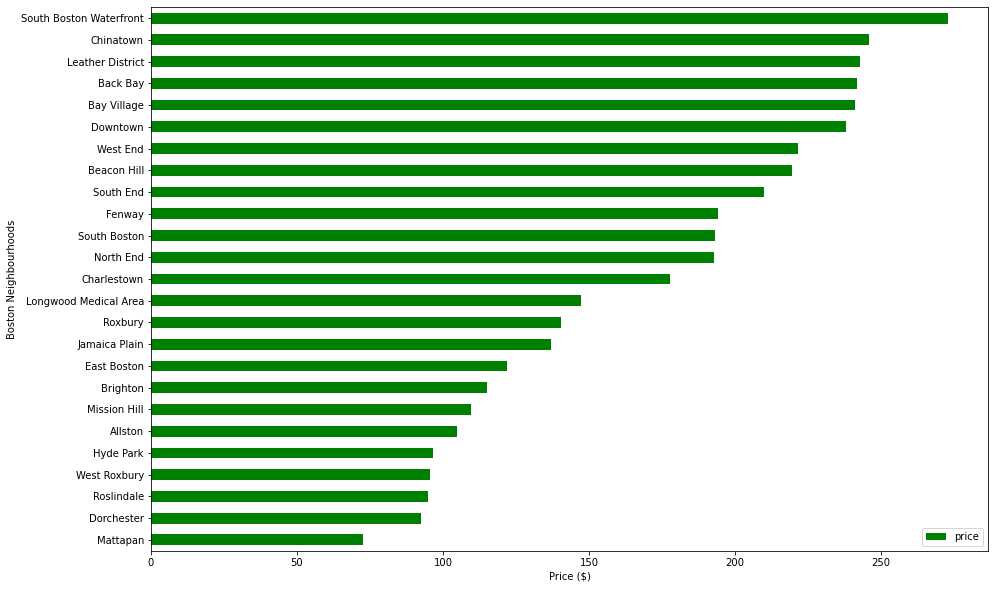

In [117]:
# plot bar plot - for average price in different locations 
price_boston = df_final.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=True)
price_boston.plot(kind='barh', figsize = (15,10), color ='green')
plt.ylabel('Boston Neighbourhoods')
plt.xlabel('Price ($)')

### Findings

* From the bar plot we can observe that South Boston Waterfron is clearly the most expensive location around Boston with average price of 270 dollars. Next comes Chinatown and Leather District with average pricings of 240 dollars.
* And as goes for the cheapest locations, Mattapan is the cheapest one with average price of 75 dollars. Next comes Dorchester and Rosindale with around 90 dollars.

### 5.2 What are the most popular and least popular neighbourhoods in Boston ?


Text(0.5, 0, 'Bookings Overall Share (%)')

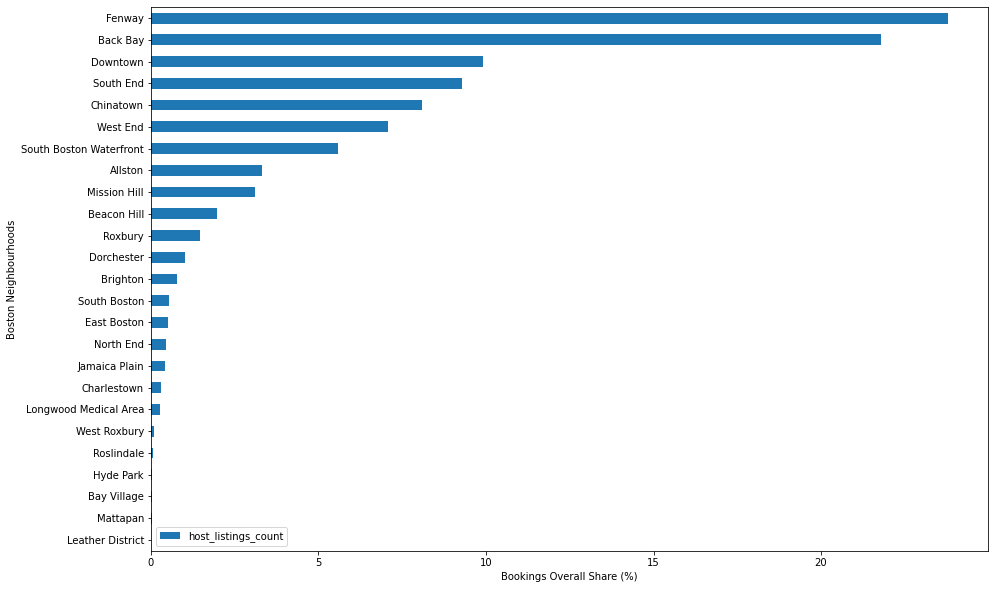

In [118]:
# plot bar plot - for count of listings in different locations in descending order.
count_boston = (((df_final.groupby(['neighbourhood_cleansed'])[['host_listings_count']].sum())/df_final['host_listings_count'].sum())*100).sort_values(by='host_listings_count',ascending=True)
count_boston.plot(kind='barh' ,figsize = (15,10))
plt.ylabel('Boston Neighbourhoods')
plt.xlabel('Bookings Overall Share (%)')

### Findings

* The highest booked neighbourhood is Fenway with more than 24% share, then comes Black Bay with slightly less than 22%  and the least booked regions are Leather District and Mattapan with less than 1% booking. 
* No wonder we see total bookings for Leather District and Mattapan is less than 1%, because of the high average price of Leather District which is more than '240' dollars and for Mattapan is '75' dollar it might be due to georaphical reason for less bookings and less average price for the region.
* The average price of Fenway region is slightly less than '200' dollar and Black Bay is around '240' dollar.


### 5.3 What are the different property types and room types which people prefer to book ?

Text(0, 0.5, 'Bookings Overall Share ( % )')

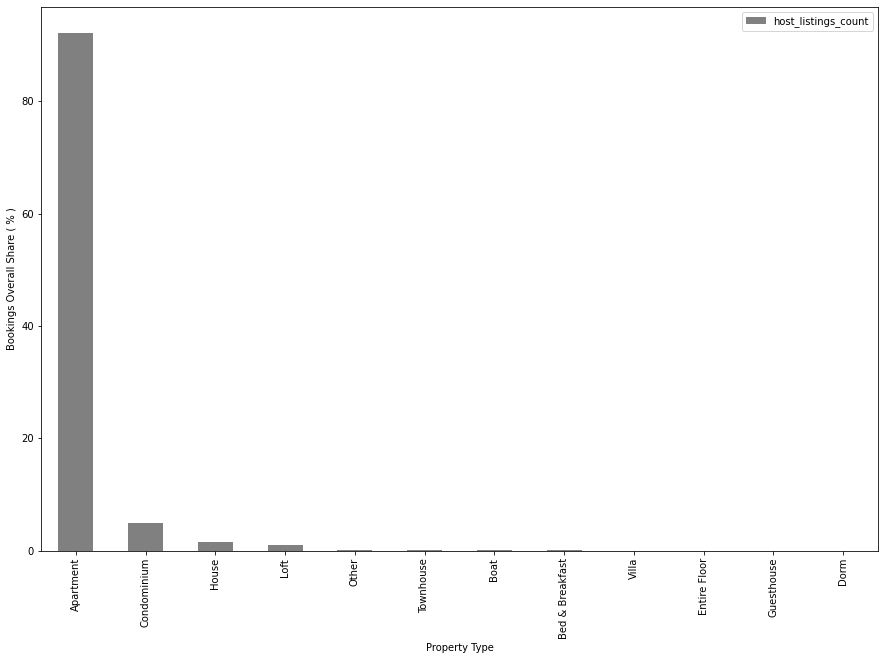

In [119]:
# plot bar plot - for percentage of bookings in different property types.
property_type_boston = (((df_final.groupby(['property_type'])[['host_listings_count']].sum())/df_final['host_listings_count'].sum())*100).sort_values(by='host_listings_count',ascending=False)
property_type_boston.plot(kind='bar' ,figsize = (15,10),color = 'grey')
plt.xlabel('Property Type')
plt.ylabel('Bookings Overall Share ( % )')

### Findings

* Most booked property type is Apartment with more than ~92% share next comes Condominium with ~4% share and House with ~2% share.

Text(0, 0.5, 'Bookings Overall Share ( % )')

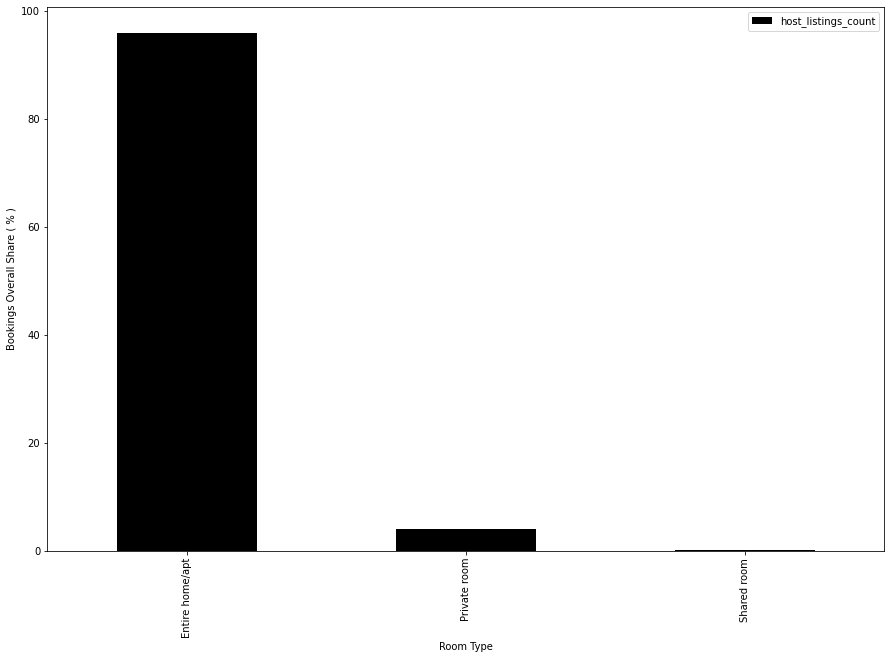

In [120]:
# plot bar plot - for percentage bookings in different room types.
room_type_boston = (((df_final.groupby(['room_type'])[['host_listings_count']].sum())/df_final['host_listings_count'].sum())*100).sort_values(by='host_listings_count',ascending=False)
room_type_boston.plot(kind='bar' ,figsize = (15,10),color = 'black')
plt.xlabel('Room Type')
plt.ylabel('Bookings Overall Share ( % )')

### Findings

* People book mostly Entire home/appartment and it has ~95% share overall, Private rooms with slightly less than 5% share and the least booked room type is Shared room with less than 1%.

### 5.4 Which neighbouhoods in Boston are the highest and lowest rated by people in reviews ?

Text(0.5, 0, 'Review Positivity Scores')

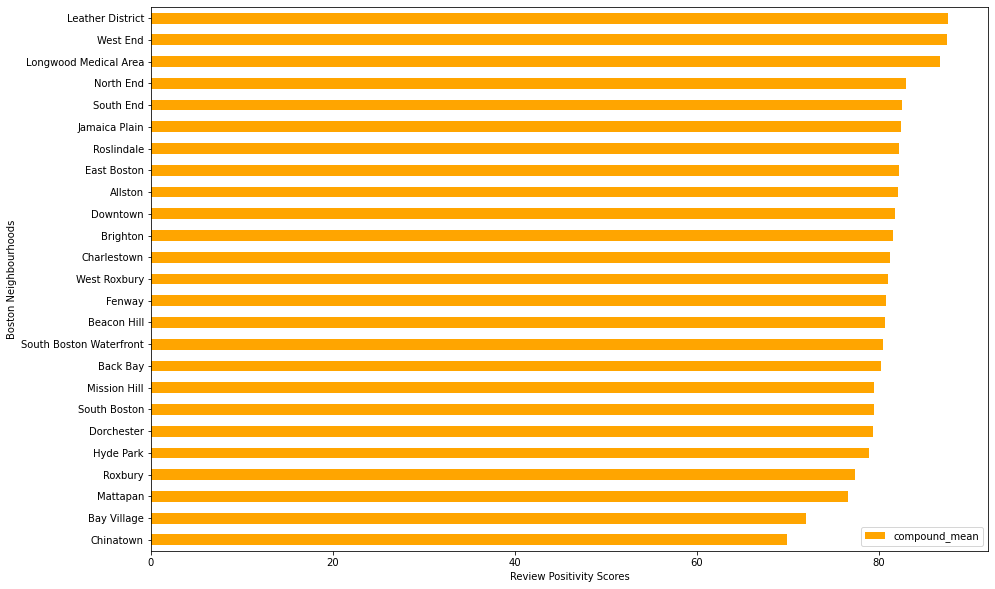

In [121]:
# plot bar plot - for average review in different locations 
review_boston = (df_final.groupby(['neighbourhood_cleansed'])[['compound_mean']].mean()*100).sort_values(by='compound_mean',ascending=True)
review_boston.plot(kind='barh', figsize = (15,10), color ='orange')
plt.ylabel('Boston Neighbourhoods')
plt.xlabel('Review Positivity Scores')

### Findings

* The top reviewed neighbourhoods are Leather District, West End and Longwood Medical Area with greater than 90% positive scores.
* The lowest reviewed neighbourhoods are Chinatown, Bay Village and Mattapan with less than 78% positive scores.

### 5.5 What are the factors that relates to price of the property ?

This quuestion can be sub divided into three sub categories - `amenities`,`ratings and reviews` and `property characteristics`.

#### 5.5.1 Does particular amenities provided to customers can obtain higher price ?

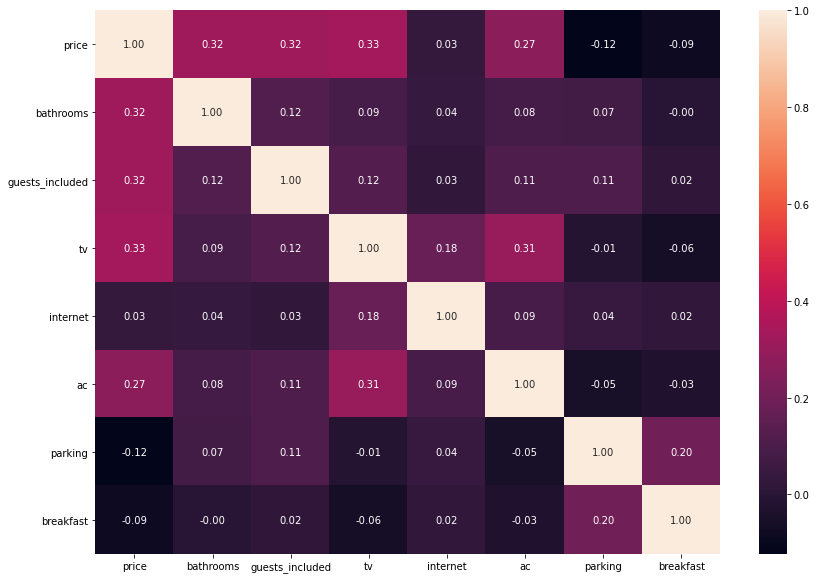

In [122]:
# analyze relation of price and amenities provided.
df_amenities = df_final[['price','bathrooms','guests_included','tv','internet','ac','parking','breakfast']]
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_amenities.corr(),annot=True,  fmt='.2f');

### Findings

* From the above heat map we can clearly observe that the correlation of variable `price` with `bathrooms`,`guests_included`,`tv` and `ac` is high which means the increase in the value of these variables leads to the increase in the price of the property.
* As goes for `internet` the correlation is 0.03 which is rather low than the others which implies the price is not  impacted majorly with this service.
* The variables `parking` and `breakfast` have next to no impact on the price.

#### 5.5.2 Will the ratings and reviews play a crutial role when compared to price ?

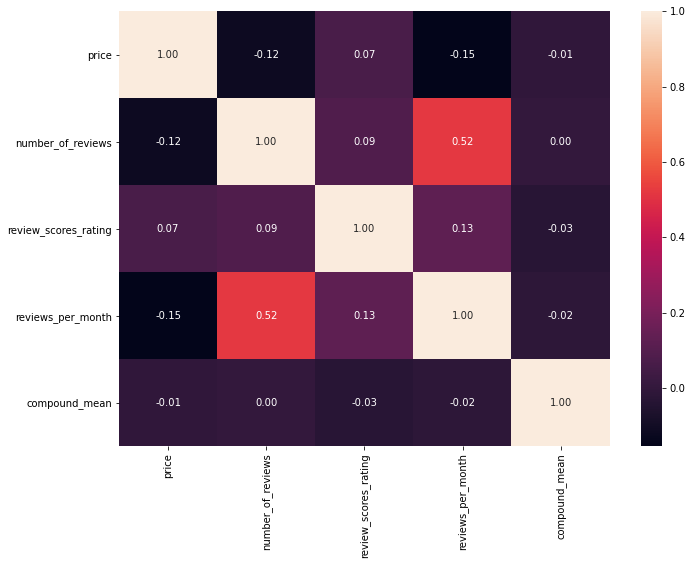

In [123]:
# analyze relation of price and reviws and ratings provided.
df_ratings = df_final[['price','number_of_reviews','review_scores_rating','reviews_per_month','compound_mean']]
fig, ax = plt.subplots(figsize=(11,8))
sns.heatmap(df_ratings.corr(),annot=True,  fmt='.2f');

### Findings

* From the above heat map we observe that the correlation of variable `price` with `review_scores_rating` which is the rating provided by the customer during stay and `compound_mean` which is the rating provided by the customer after service is rather observable which means the increase in the value of these variables leads to the increase in the price of the property.
* As goes for `number_of_reviews` which is the total number of reviews provided by customer to the property and `reviews_per_month` which is the average reviews per month is rather low which implies the price is not impacted majorly with this service.

#### 5.5.3 Does property characteristics and services lead to obtain higher prices ?

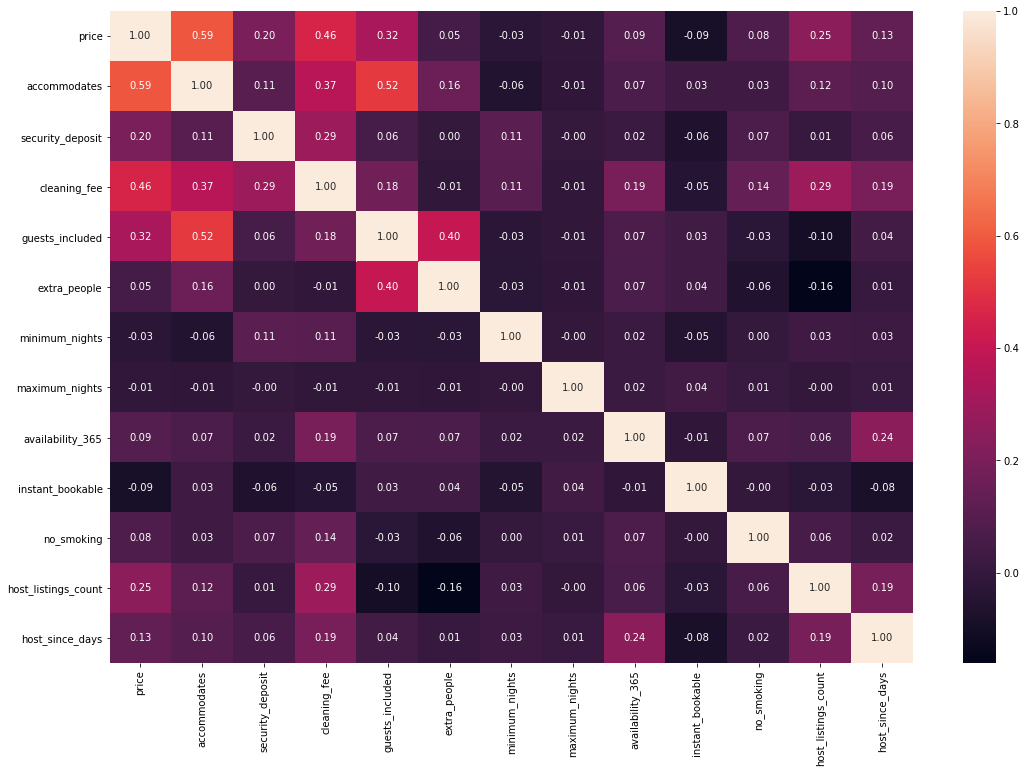

In [124]:
# analyze relation of price and amenities provided.
df_services = df_final[['price','accommodates','security_deposit','cleaning_fee','guests_included','extra_people',
                        'minimum_nights','maximum_nights','availability_365','instant_bookable','no_smoking',
                        'host_listings_count','host_since_days']]
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_services.corr(),annot=True,  fmt='.2f');

### Findings

* There is high correlation between `price` and the other five variables viz, `accomodates`,`security_deposit`,`cleaning_fee`,`guests_included` and `host_listings_count`. This means the price is related to the number of people a property can accomodate which is true universally, the increase in security deposit leads to the increase in price, cleaning fee has a major impact on price and the more is the hosts listing count the more the price is.

### 5.6 Which months have the highest prices of bookings ?

In [125]:
# sort date by descending order
df_calendar = df_calendar.sort_values('date', ascending=False)

In [126]:
# groupby month from the date column 
date_month_mean = (df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))[['price']].mean()).sort_values(by='price',ascending=False)

Text(0, 0.5, 'Months')

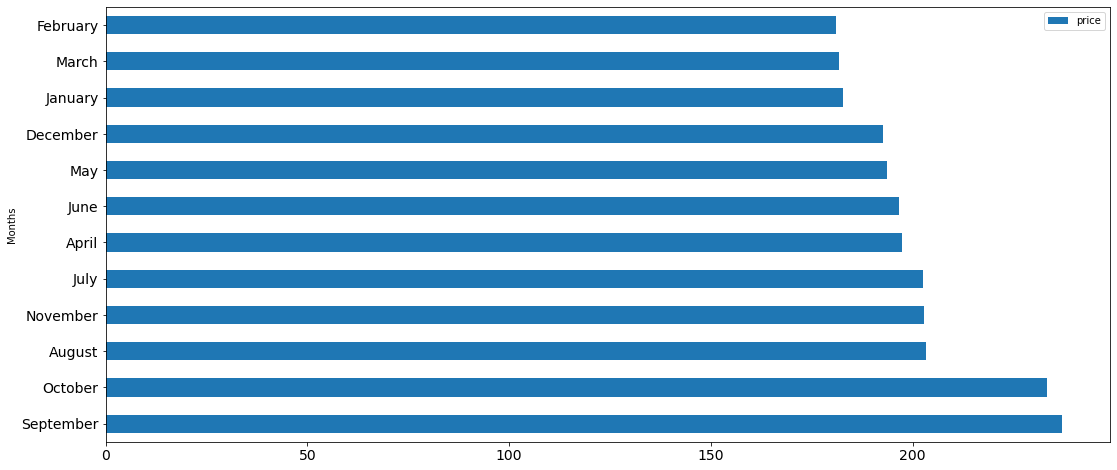

In [127]:
# plot bar plot by number 
date_month_mean.plot(kind = 'barh' , fontsize = 14, figsize=(18,8));
plt.ylabel('Months')

* We see a sudden surge in the prices of the property during September and October, the average difference is around 50 - 70 dollars. The reason can certainly be due to the off season.

### 5.6 What are the factors that relates to number of listings of the property ?

##### Almost all the wrangling process has been done so its time to proceed to building the predictive model to predict the price with all the correlating variables.


In [128]:
# Since the model only accepts numeric data we need to manipulate the objet data type variables.
# check object type variables 
df_final.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'], dtype='object')

In [129]:
# copy data frame
df_pred = df_final

In [130]:
# drop object data type variables
df_pred.drop(df_final.select_dtypes(include=['object']).columns.tolist(), axis = 1, inplace = True)

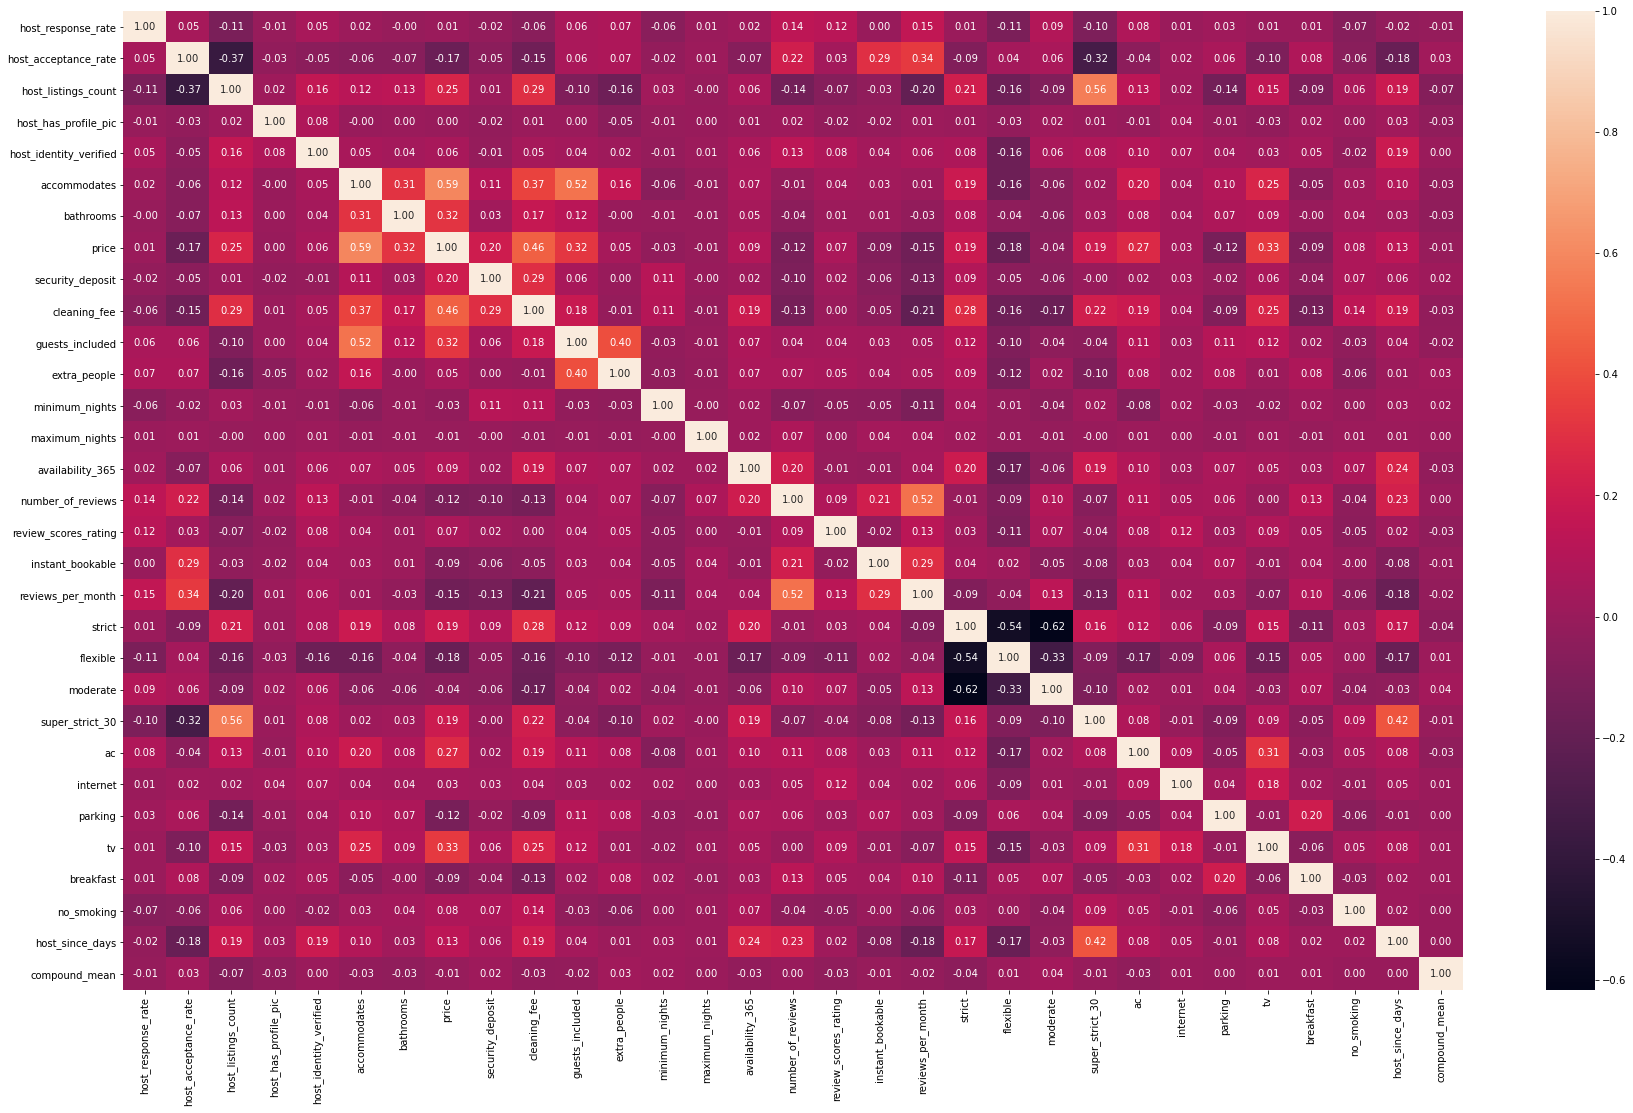

In [139]:
fig, ax = plt.subplots(figsize=(30,18))
sns.heatmap(df_pred.corr(), annot = True,  fmt='.2f');

In [140]:
# drop low correlation columns
df_pred.drop([['host_acceptance_rate','minimum_nights','maximum_nights','instant_bookable',
               'reviews_per_month','flexible','moderate','parking','breakfast']], axis = 1, inplace = True)

KeyError: "[('host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'instant_bookable', 'reviews_per_month', 'flexible', 'moderate', 'parking', 'breakfast')] not found in axis"

In [131]:
# Create variable X and y for training
y = df_pred['price']
X = df_pred.drop(['price'], axis = 1)

In [132]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [133]:
# check shape of the train data set
print(X_train.shape, y_train.shape)

(1803, 30) (1803,)


In [134]:
# check shape of the test data set
print(X_test.shape, y_test.shape)

(774, 30) (774,)


In [135]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.5396377262763417
5773.2144694935405
32.288999999999994


0       id                                                int64
1       house_rules                                       object
2       host_id                                           int64
3       host_since                                        datetime64[ns]
4       host_response_time                                object
5       host_response_rate                                float64
6       host_acceptance_rate                              float64
7       host_neighbourhood                                object
8       host_listings_count                               int64
9       host_has_profile_pic                              int64
10      host_identity_verified                            int64
11      street                                            object
12      neighbourhood_cleansed                            object
13      property_type                                     object
14      room_type                                         object
15      accommodates                                      int64
16      bathrooms                                         int64
17      bedrooms                                          int64
18      beds                                              int64
19      bed_type                                          object
20      amenities                                         object
21      price                                             float64
22      security_deposit                                  float64
23      cleaning_fee                                      float64
24      guests_included                                   int64
25      extra_people                                      float64
26      minimum_nights                                    int64
27      maximum_nights                                    int64
28      availability_30                                   int64
29      availability_60                                   int64
30      availability_90                                   int64
31      availability_365                                  int64
32      number_of_reviews                                 int64
33      review_scores_rating                              float64
34      review_scores_accuracy                            float64
35      review_scores_cleanliness                         float64
36      review_scores_checkin                             float64
37      review_scores_communication                       float64
38      review_scores_location                            float64
39      review_scores_value                               float64
40      instant_bookable                                  int64
41      cancellation_policy                               object
42      reviews_per_month                                 float64
43      ac                                                bool
44      internet                                          bool
45      parking                                           bool
46      tv                                                bool
47      breakfast                                         bool
48      no_smoking                                        object

#### 5.5.3 Can host's characteristics lead to gain higher number of bookings ?

In [ ]:
# analyze relation of price and amenities provided.
df_amenities = df_final[['price','host_response_rate','guests_included','tv','internet','ac','parking','breakfast']]
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_amenities.corr(),annot=True,  fmt='.2f');

In [ ]:
fig, ax = plt.subplots(figsize=(30,22))
sns.heatmap(df_final.corr(),annot=True,  fmt='.2f');

In [ ]:
df_final.describe()

In [ ]:
check_dtype(df_final)